# Исследование рынка недвижимости

# Введение

### Описание проекта 
Проект нацелен на анализ данных от сервиса Яндекс Недвижимость для того, чтобы установить параметры, которые позволят построить автоматизированную систему, позволяющую отслеживать аномалии и мошенническую деятельность.
### Цель проекта
Найти особенности и зависимости, которые существуют на рынке недвижимости.
### Описание данных
**Входные данные от сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.**  

В таблице представлены следующие значения:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### План работы
1. Изучение общей информации о данных
2. Предобработка данных
  - Обработка пропусков
  - Обработка аномальных значений
  - Изменение типов данных
  - Поиск и удаление дубликатов
  - Категоризация данных
3. Исследовательский анализ данных
  - общая площадь
  - жилая площадь
  - площадь кухни
  - цена объекта
  - количество комнат
  - высота потолков
  - этаж квартиры
  - тип этажа квартиры («первый», «последний», «другой»)
  - общее количество этажей в доме
  - расстояние до центра города в метрах
  - расстояние до ближайшего аэропорта
  - расстояние до ближайшего парка
  - день и месяц публикации объявления
4. Проведение исследовательского анализа
  - Изучение параметров объявления
  - Исследование быстроты продажи квартиры
  - Определение факторов, влияющих на стоимость квартиры
  - Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
  - Расчёт стоимости удаления квартиры от центра Санкт-Петербурга на 1 километр
5. Общий вывод

## Изучение общей информации о данных 

### Импортируем необходимые библиотеки и изучим основную информацию о предоставленных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv(r'D:\projects_data\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)

raw_data = data.copy(deep=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Построим гистограммы для солбцов датафрейма

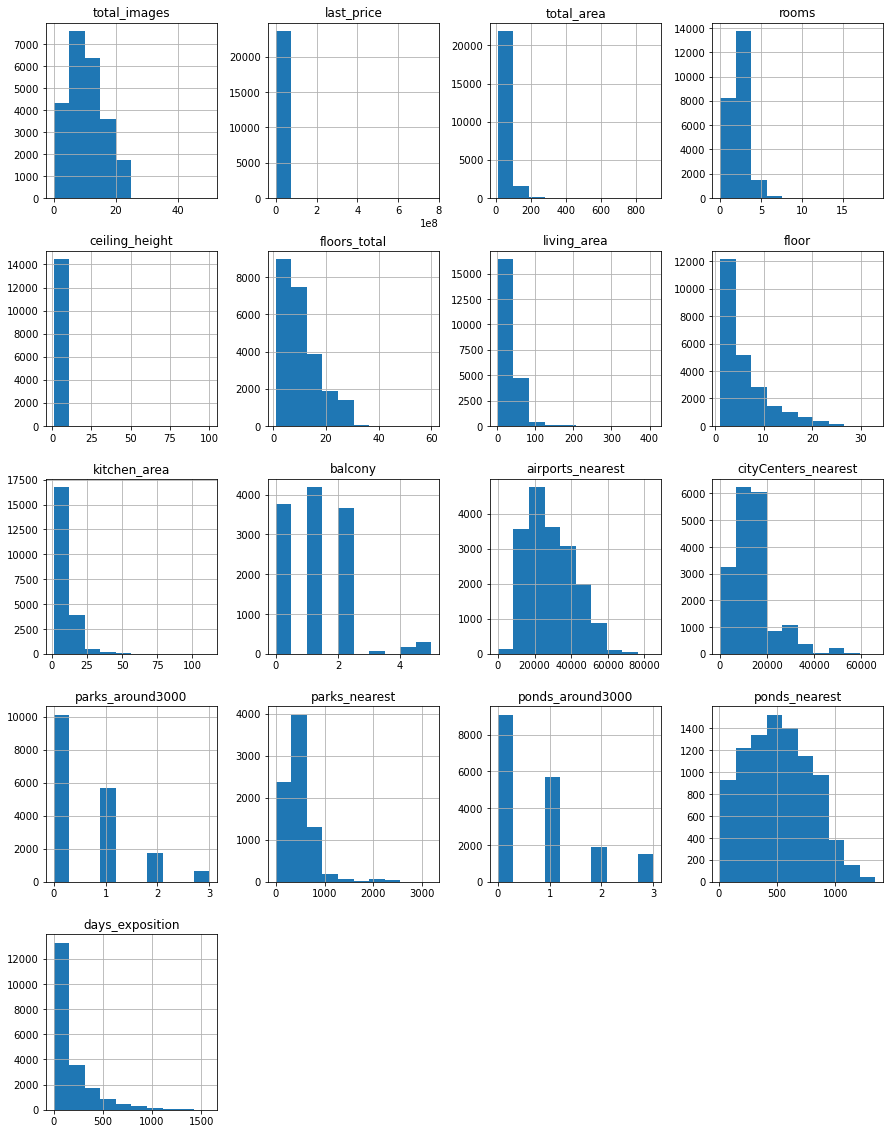

In [5]:
data.hist(figsize=(15,20))
plt.show()

## Предобработка данных

### Обработка пропусков

#### Выведем количество пропущенных значений для каждого столбца

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропуски в некоторых столбцах необходмо заменить на соответствующие значения.**  

In [7]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Количество пропусков в %'+"\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

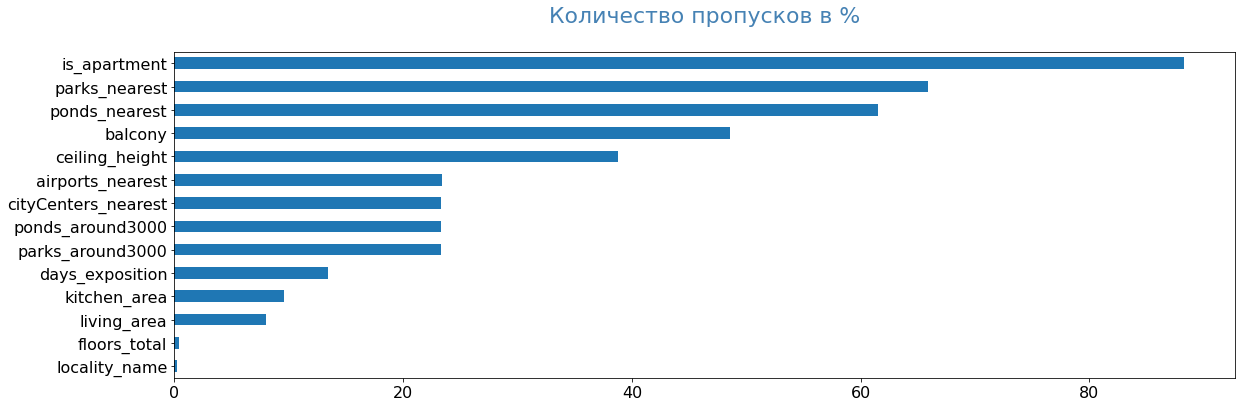

In [8]:
pass_value_barh(data)

#### Обработка значений в столбце `ceiling_height`

**Взглянем на информацию о столбце с высотой потолков.**

In [9]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [10]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Как мы видим, в данных присутствуют неправдоподобные значения. Для исследования возьмём диапазон значений от 2.2 до 5.0 метров. Допустим, что некоторые люди ошибочно поставили запятую в высоте потолка и разделим аномально большие значения на 10, а остальные значения примем за аномалии и заменим их средним значением.**

In [11]:
# Задаём диапазон значений высоты потолка
height_filter = (data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 5)
# Заменяем аномальные значения столбца, которые могли быть введены по ошибке
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 5, data['ceiling_height']/10)

**Для аномальных значений в `ceiling_height` возьмём медианную высоту потолков в квартирах.**

In [12]:
data['ceiling_height'].where(height_filter, -1, inplace=True)

**Пропуски в столбце с высотой потолка необходимо оставить, так как их заполнение с помощью ad-hoc методов может привести к искажению выводов.**

#### Обработка пропусков столбца `floors_total`

In [13]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Заменим пропущенные значения маркером "-1".**

In [14]:
data['floors_total'] = data['floors_total'].fillna(-1) #marker

In [15]:
data.query('floors_total != -1 and floors_total < floor')

NumExprClobberingError: Variables in expression "((floors_total) != (-(1))) & ((floors_total) < (floor))" overlap with builtins: ('floor')

#### Обработка пропусков столбца `living_area`

In [ ]:
data['living_area'].describe()

**Заменим пропуски маркером "-1".**

In [ ]:
data['living_area'] = data['living_area'].fillna(-1)

#### Обработка пропусков столбца `is_apartment`

In [ ]:
data['is_apartment'].unique()

**Допустим, что пропущенные значения в столбце говорят о том, что данная квартира не входит в категорию апартаментов. Заменим все пропущенные значения на `False`.**

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Обработка пропусков столбца `kitchen_area`

In [ ]:
data['kitchen_area'].describe()

**Заполним пропуски медианным значением площади кухни.**

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)

**Отфильтруем аномальные значения.**

In [ ]:
#data = data.query('(living_area + kitchen_area) <= total_area*0.9')
data.query('(living_area + kitchen_area) >= total_area*0.9')

#### Обработка пропусков столбца `balcony`

In [ ]:
data['balcony'].describe()

**Допустим, что пропуск говорит нам о том, что в данной квартире нет балкона.**

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

#### Обработка пропусков столбца `locality_name`

**Удалим строки с пропущенными значениями, так как восстановить их невозможно.**

In [ ]:
data = data.loc[~ data['locality_name'].isna()].reset_index(drop=True)

In [ ]:
data['locality_name'].value_counts()

#### Обработка пропусков столбца `airports_nearest`

In [ ]:
data['airports_nearest'].describe()

**Заменим пропуски маркером "-1".**

In [ ]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)

#### Обработка пропусков столбца `cityCenters_nearest`

In [ ]:
data['cityCenters_nearest'].describe()

**Заменим пропуски маркером "-1", чтобы можно было конвертировать столбец в целочисленный тип.**

In [ ]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

#### Обработка пропусков столбца `parks_around3000`

**Скорее всего пропуски связаны с отсутствием парков в радиусе 3 км. Зменим пропуски на значение 0.**

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

#### Обработка пропусков столбца `parks_nearest`

In [ ]:
data['parks_nearest'].describe()

**Заполним пропуски маркером "-1".**

In [ ]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)

#### Обработка пропусков столбца `ponds_around3000`

**Скорее всего пропуски связаны с отсутствием водоёмов в радиусе 3 км.
Зменим пропуски на значение 0.**

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### Обработка пропусков столбца `ponds_nearest`

In [ ]:
data['ponds_nearest'].describe()

**Заполним пропуски маркером "-1".**

In [ ]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

#### Обработка пропусков столбца `days_exposition`

In [ ]:
data['days_exposition'].describe()

**Так как некоторые квартиры находятся на продаже, заменим пропуски маркером "-1".**

In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

#### Проверка после обработки пропусков

In [ ]:
pass_value_barh(data)

#### Промежуточный вывод

**В данных присутствовало большое количество пропусков связанных с тем, что продавцы зачастую не указывают количество отсутствующих параметров квартиры, таких как балкон или объект в определённом радиусе от квартиры.**

### Преобразование типов данных

**Для дальнейшего анализа необходимо преобразовать тип столбца данных `first_day_exposition` из `object` в `datetime`. Столбец `is_apartment` в булев тип данных, а столбцы `floors_total`, `balcony parks_around3000`, `ponds_around3000` в `int`, так как они содержат целочисленные данные.**

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)

int_list = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest']

for i in int_list:
    data[i] = data[i].astype(int)

### Обработка дубликатов

In [ ]:
data.duplicated().sum()

**Явных дубликатов в датафрейме не было обнаружено, но в списке названий есть дубликаты с неправильным написанием буквы "Ё". Заменим их на правильные и тем самым избавимся от неявных дубликатов. Попытаемся найти неявные.**

In [ ]:
data['locality_name'].value_counts()

In [ ]:
data['locality_name'].sort_values().unique()

**Заменим букву "е" на "ё".**

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [ ]:
data['locality_name'].nunique()

### Обработка редких и выбивающихся значений

**Отфильтруем редкие и выбивающиеся значения.**

In [ ]:
data = (
        data
            .query('5 * 10**5 < last_price < 30 * 10**6')
            .query('rooms <= 7')
            .query('total_area < 250')
            .query('ceiling_height <= 4')
            .query('not(0 <= living_area < 10 or living_area >= 140)')
            .query('not(0 <= kitchen_area < 4 or kitchen_area >= 30)')
            .query('floors_total < 35')    
            .query('airports_nearest < 70000')
        )

**Проверим процент оставшихся данных.**

In [ ]:
print('Отфильтровано:',(len(raw_data) - len(data))/len(raw_data)*100 , '%')

### Промежуточный вывод

**В данных были выявлены неявные дубликаты, которые были вызваны некорректным вводом информации пользователями, а именно ошибка в напсании буквы "ё", а также отфильтрованы выбивающиеся и редкие значения.**

In [ ]:
# check
data.info()

**Статистика по сырым данным.**

In [ ]:
(
    raw_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

**Проверка по отфильтрованным данным.**

In [ ]:
(
    data
    .query('rooms != -1 & ceiling_height != -1 & days_exposition != -1 \
    & living_area != -1 & kitchen_area != -1 & floors_total != -1')
            [['rooms', 'total_area', 'ceiling_height', 'days_exposition', 
              'last_price', 'living_area',  'kitchen_area','floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [ ]:
(
    data
#     .query('rooms != -1 & ceiling_height != -1 & days_exposition != -1')
#     .query('living_area != -1 & kitchen_area != -1 & floors_total != -1')
            [['rooms', 'total_area', 'ceiling_height', 'days_exposition', 
              'last_price', 'living_area',  'kitchen_area','floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [ ]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

In [ ]:
# check
data.rooms.value_counts().to_frame()

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

Значения параметров объектов недвижимости на разных квантилях

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

## Посчитайте и добавьте в таблицу новые столбцы

### Рассчитаем цену одного квадратного метра

In [ ]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round()

### Категоризируем по времени публикации

#### По дню недели.

In [ ]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

#### По месяцу публикации.

In [ ]:
data['month'] = data['first_day_exposition'].dt.month

#### По году публикации.

In [ ]:
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
data[['first_day_exposition','square_meter_price', 'day_of_week', 'month', 'year']].head()

### Категоризируем квартиры по этажу

**Создадим функцию, которая присваивает категорию по этажу.**

In [ ]:
data['floor_category'] = 'other'
data.loc[data['floors_total'] == data['floor'], 'floor_category'] = 'last'
data.loc[data['floors_total'] == -1, 'floor_category'] = 'unknown'
# часть квартир с неизвестным количеством этажей будут переименованы, 
# так как категория первых этажей не зависит от общего количества этажей
data.loc[data['floor'] == 1, 'floor_category'] = 'first'

In [ ]:
data['floor_category'].value_counts()

**И функцию которая присвоит численные категории для определения зависимостей в дальнейшем.**
  - 1 - первый  
  - 2 - другой  
  - 3 - последний  
  - 0 - неизвестный

In [ ]:
# check
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    
data['floor_status'] = data.apply(floor_status, axis=1)

In [ ]:
def floor(row):
    for i in range(len(data)):
        if row == 'first':
            return 1
        elif row == 'last':
            return 3
        elif row == 'other':
            return 2        
        else:
            return 0

In [ ]:
data['floor_category_num'] = data['floor_category'].apply(floor)

In [ ]:
data['floor_category_num'].value_counts()

In [ ]:
data[['floor', 'floors_total', 'floor_category', 'floor_category_num']].head()

### Запишем расстояние до центра города в километрах

In [ ]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(int)

In [ ]:
data['cityCenters_nearest_km'].head(3)

### Промежуточный вывод

**В таблицу были внесены дополнительные параметры, по которым будет проводиться исследование в следующих этапах.**

## Проведите исследовательский анализ данных

### Изучение параметров

#### Общая площадь

In [ ]:
data['total_area'].describe()

In [ ]:
fig, ax = plt.subplots()

data['total_area'].plot(kind='hist', bins=100, grid=True, figsize=(10,4))

ax.set_title('Распределение общей площади'+"\n", fontsize=14)

ax.set_xlabel("\n"'Общая площадь, м.', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.locator_params(axis='x', nbins=20)

plt.show()

**Наиболее распространеными явялются квартиры с площадью от 30 до 80 квадратных метров. Дальнейше увеличение площади связано с уменьшением количества квартир.**

#### Жилая площадь

In [ ]:
data['living_area'].describe()

In [ ]:
fig, ax = plt.subplots()

(
    data
    .query('living_area != -1')['living_area']
    .plot(kind='hist', bins=200, grid=True, figsize=(10,4))
)

ax.set_title('Распределение жилой площади'+"\n", fontsize=14)

ax.set_xlabel('Жилая площадь, м.', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.locator_params(axis='x', nbins=20)

plt.show()

**На графике видно, что первый пик количества квартир по жилой площади приходится на 16-18 квадратных метров, а второй на 30 квадратных метров.**

#### Площадь кухни

In [ ]:
data['kitchen_area'].describe()

In [ ]:
fig, ax = plt.subplots()

(
    data
    .query('kitchen_area != -1')['kitchen_area']
    .plot(kind='hist', bins=40, grid=True, figsize=(10,4))
)

ax.set_title('Распределение площади кухни'+"\n", fontsize=14)

ax.set_xlabel('Площадь кухни, м.', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.locator_params(axis='x', nbins=20)

plt.show()

**Чаще всего встречаются квартиры с площадью кухни в 5-11 квадратных метров.**

#### Цена объекта

In [ ]:
data['last_price'].describe()

In [ ]:
fig, ax = plt.subplots()

(data['last_price']/10**6).plot(kind='hist', bins=150, grid=True, figsize=(10,4))

ax.set_title('Распределение цен'+"\n", fontsize=14)

ax.set_xlabel('Цена, млн.', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.locator_params(axis='x', nbins=35)

plt.show()

**Чаще всего встречаются квартиры стоимостью 2-7 млн.**

#### Количество комнат

In [ ]:
fig, ax = plt.subplots()

(
    data['rooms']
                 .value_counts(sort=False)
                 .plot(kind='bar', grid=True, figsize=(8,4))
)

ax.set_title('Распределение по числу комнат'+"\n", fontsize=14)

ax.set_xlabel('Число комнат', fontsize=12)
ax.set_ylabel('Количество квартир', fontsize=12)

plt.xticks(rotation=0)

plt.show()

**Больше всего распространены квартиры с 1, 2, 3 комнатами.**

#### Высота потолков

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('ceiling_height != -1')['ceiling_height']
        .plot(kind='hist', bins=50, grid=True, figsize=(10,4))
)

ax.set_title('Распределение высот потолка'+"\n", fontsize=14)

ax.locator_params(axis='x', nbins=20)

plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество', fontsize=12)

plt.show()

**2.5 метра - самая распространёная высота потолков.**

#### Этаж квартиры

In [ ]:
fig, ax = plt.subplots()

data['floor'].plot(kind='hist', bins=32, grid=True, figsize=(10,4))

plt.suptitle('Распределение этажей квартир'+"\n", fontsize=16)

ax.locator_params(axis='x', nbins=60)

plt.xlabel('Этаж', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

**Чаще продают квартиры на нижних этажах.**

#### Тип этажа квартиры

In [ ]:
data['floor_category'].value_counts()

In [ ]:
fig, ax = plt.subplots()

(
    data['floor_category']
                          .value_counts()
                          .plot(kind='bar', grid=True, figsize=(8,4))
)

ax.set_title('Распределение по типам этажа квартиры'+"\n", fontsize=14)

ax.set_xlabel("\n"+'Тип этажа', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.set_xticklabels(['Другой','Последний','Первый','Неизвестный'], rotation=0)

plt.show()

**Квартиры на последнем этаже продаются реже, чем на первом.**

#### Общее количество этажей в доме

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('floors_total >=1')['floors_total']
        .plot(kind='hist', bins=100, grid=True, figsize=(10,4))
)

ax.set_title('Распределение по количеству этажей в доме'+"\n", fontsize=14)

ax.set_xlabel('Всего этажей', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.locator_params(axis='x', nbins=40)

plt.show()

**Чаще всего продаются квартиры в пятиэтажных домах и в девятиэтажных.**

#### Расстояние до центра города в метрах

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('cityCenters_nearest >= 0')['cityCenters_nearest']
        .plot(kind='hist', bins=120, grid=True, figsize=(10,4))
)

ax.set_title('Распределение удаления от центра'+"\n", fontsize=16)

ax.set_xlabel('Расстояние до центра', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

plt.show()

**Большинство квартир располагаются в пределах 20 километров от центра населённого пункта.**

#### Расстояние до ближайшего аэропорта

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('airports_nearest >= 0')['airports_nearest']
        .plot(kind='hist', bins=120, grid=True, figsize=(10,4))
)

ax.set_title('Распределение удаления от аэропорта'+"\n", fontsize=16)

ax.set_xlabel('Расстояние до аэропорта, м.', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

plt.show()

**Практически все квартиры расположены в пределах 55 км от аэропорта.**

#### Расстояние до ближайшего парка

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('parks_nearest >= 0')['parks_nearest']
        .plot(kind='hist', bins=120, grid=True, figsize=(10,4))
)

ax.set_title('Распределение удаления от парка'+"\n", fontsize=16)

ax.set_xlabel('Расстояние до парка', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

plt.show()

**Большинство квартир располагаются менее чем в 1 километре от парка.**

#### День, месяц и год публикации объявления

In [ ]:
fig, ax = plt.subplots()

ax.plot( data.groupby('year').count(), color = 'blue')

ax.set_title('Распределение объявлений по времени от публикации до снятия'+"\n", size=14)

ax.set_xlabel('Год', size=12)
ax.set_ylabel('Количество объявлений', size=12)

fig.set_figwidth(10)
fig.set_figheight(4)

ax.grid()

plt.show()

In [ ]:
data.sort_values(by='first_day_exposition')['first_day_exposition']

**На графике распределения объявлений по годам видно, что идёт рост до 2018 года, а в 2019 спад. Спад связан с тем, что крайняя маркировка даты в датасете заканчивается в мае.** 

In [ ]:
fig, ax = plt.subplots()

(
    data['day_of_week']
                       .value_counts(sort=False)
                       .plot(kind='bar', grid=True, figsize=(10,4))
)

ax.set_title('Распределение публикаций объявлений по дням недели'+"\n", fontsize=14)

ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб','Вс'], rotation=0)

plt.show()

In [ ]:
fig, ax = plt.subplots()

(
    data['month']
                 .value_counts(sort=False)
                 .plot(kind='bar', grid=True, figsize=(10,4))
)

ax.set_title('Распределение публикаций объявлений по месяцам'+"\n", fontsize=14)

ax.set_xlabel('Месяц', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)

ax.set_xticklabels(['Январь', 'Февраль', 'Март',
                    'Апрель', 'Май', 'Июнь', 
                    'Июль', 'Август', 'Сентябрь', 
                    'Октябрь', 'Ноябрь', 'Декабрь'], 
                    rotation=0,
                    size=9)

plt.show()

**По данным графикам можно сделать выводы о том, что по выходным пользователи публикуют объявления реже, чем в будние дни, а также, что пик публикаций приходится на конец зимы - начало весны и конец осени.**

### Изучение факторов быстроты продажи квартир

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('days_exposition > 0')['days_exposition']
        .plot(kind='hist', bins=120, grid=True, figsize=(10,4))
)

ax.set_title('Распределение объявлений по времени от публикации до снятия'+"\n", fontsize=16)

ax.set_xlabel('Общее время', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

plt.show()

In [ ]:
data.query('days_exposition != -1')['days_exposition'].describe()

**В среднем квартиры продаются за 178 дней, но на этот результат оказывают влияние слишком долгие и слишком быстрые продажи, чтобы получить более объективное значение возьмём самое распространенное время продажи в 94 дня. Быстрой продажей можно считать продажу за менее, чем 44 дня. Слишком долгой продажей можно считать продажу более чем за 227 дня.**

#### Средняя скорость продаж по годам

In [ ]:
data.query('days_exposition != -1 and year == 2019')['days_exposition'].describe()

In [ ]:
fig, ax = plt.subplots()
(
    data
        .query('days_exposition != -1')
        .groupby('year')['days_exposition']
        .mean()
        .plot(kind='line', style='o-' ,grid=True, figsize=(10,4))
)

ax.set_title('Распределение объявлений по времени от публикации до продажи'+"\n", size=14)

ax.set_xlabel('Год', size=12)
ax.set_ylabel('Время продажи', size=12)

plt.show()

**На графике видно, что время продажи уменьшается, следовательно, средняя скорость продажи с годами увеличивается.**

#### Средняя скорость продаж от количетсва комнат

In [ ]:
fig, ax = plt.subplots()
(
    data
        .query('days_exposition != -1')
        .groupby('rooms')['days_exposition']
        .mean()
        .plot(kind='bar' ,grid=True, figsize=(10,4))
)

ax.set_title('Распределение объявлений по времени продажи от количества комнат'+"\n", size=14)

ax.set_xlabel('Количество комнат', size=12)
ax.set_ylabel('Время продажи', size=12)

plt.ylim(0,350)
plt.xticks(rotation=0)
plt.show()

#### Средняя скорость продаж от количетсва фотографий

In [ ]:
fig, ax = plt.subplots()
(
    data
        .query('days_exposition != -1')
        .groupby('total_images')['days_exposition']
        .mean()
        .plot(kind='line', style='o-' ,grid=True, figsize=(10,4))
)

ax.set_title('Распределение объявлений по времени продажи от количества фотографий'+"\n", size=14)

ax.set_xlabel('Количество фотографий', size=12)
ax.set_ylabel('Время продажи', size=12)

plt.ylim(0,350)

plt.show()

#### Средняя скорость продаж от этажа

In [ ]:
fig, ax = plt.subplots()
(
    data
        .query('days_exposition != -1')
        .groupby('floor')['days_exposition']
        .mean()
        .plot(kind='bar', style='o-' ,grid=True, figsize=(10,4))
)

ax.set_title('Распределение объявлений по времени продажи от этажа'+"\n", size=14)

ax.set_xlabel('Этаж', size=12)
ax.set_ylabel('Время продажи', size=12)

plt.ylim(0,250)
plt.xticks(rotation=0)
plt.show()

#### Средняя скорость продаж от цены

In [ ]:
data['price_range'] = pd.qcut((data['last_price']/10**6),q=20) # поделил на равные доли по ценам

In [ ]:
fig, ax = plt.subplots()

data.groupby(by='price_range')['days_exposition'].mean().plot(grid=True, figsize=(10,4))

ax.set_title('Зависимость скорости продажи от цены'+"\n", fontsize=14)


ax.set_xlabel('Цена, млн.', fontsize=14)
ax.set_ylabel('Среднее время продажи', fontsize=14)

ax.locator_params(axis='x', nbins=50)

plt.show()

Моды на реальных данных

In [ ]:
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

### Изучение факторов, оказывающих наибольшее влияния на цену квартиры

**Создадим датафрейм полностью очищенный от пропусков и аномальных значений.**

In [ ]:
good_data = (
        data
            .query('5 * 10**5 < last_price < 30 * 10**6')
            .query('0 <= rooms <= 7')
            .query('0 <= total_area < 250')
            .query('0 <= ceiling_height <= 4')
            .query('0 <= living_area <= 140')
            .query('0 <=  kitchen_area <= 30')
            .query('0 <= floors_total < 35')    
            .query('0 <= airports_nearest < 70000')
        )

In [ ]:
print('Отфильтровано:',(len(raw_data) - len(good_data))/len(raw_data)*100 , '%')

**Как мы видим, больше половины записей утрачены, зато оставшиеся даные оптимальны для подсчёта зависимостей.**

**Посмотрим на кореляцию цены квартиры с другими параметрами.**

In [ ]:
data.corr()['last_price'].sort_values(ascending=False)

In [ ]:
good_data.corr()['last_price'].sort_values(ascending=False)

**Видна значительная корреляция цены с ценой квадратного метра, площадью квартиры, жилой площадью, а также незначительная корреляция с площадью кухни, количеством комнат, высотой потолков, наличием водоёмов и парков в пределах 3 км. и удалением от центра населённого пункта.
При этом цена практически не зависит от этажа и времени публикации объявления.**

#### Зависимость от площади

In [ ]:
fig, ax = plt.subplots(1,3)

x = (good_data['last_price']/10**6).tolist()
y_1 = good_data['total_area'].tolist()
y_2 = good_data['living_area'].tolist()
y_3 = good_data['kitchen_area'].tolist()

ax[0].scatter(x=x, y=y_1, data=good_data, alpha=0.2)
ax[1].scatter(x=x, y=y_2, data=good_data, alpha=0.2)
ax[2].scatter(x=x, y=y_3, data=good_data, alpha=0.2)

ax[0].set_title('Зависимость цены от площади'+"\n", fontsize=14)
ax[1].set_title('Зависимость цены от жилой площади'+"\n", fontsize=14)
ax[2].set_title('Зависимость цены от площади кухни'+"\n", fontsize=14)

ax[0].set_xlabel('Цена, млн.', fontsize=14)
ax[0].set_ylabel('Общая площадь', fontsize=14)
ax[1].set_xlabel('Цена, млн.', fontsize=14)
ax[1].set_ylabel('Жилая площадь', fontsize=14)
ax[2].set_xlabel('Цена, млн.', fontsize=14)
ax[2].set_ylabel('Площадь кухни', fontsize=14)

fig.set_figwidth(16)
fig.set_figheight(5)

plt.show()

In [ ]:
data_1 = data.query('total_area != -1 and living_area != -1 and kitchen_area != -1')
fig, ax = plt.subplots(1,3)

x = (data_1['last_price']/10**6).tolist()
y_1 = data_1['total_area'].tolist()
y_2 = data_1['living_area'].tolist()
y_3 = data_1['kitchen_area'].tolist()

ax[0].scatter(x=x, y=y_1, data=data_1, alpha=0.2)
ax[1].scatter(x=x, y=y_2, data=data_1, alpha=0.2)
ax[2].scatter(x=x, y=y_3, data=data_1, alpha=0.2)

ax[0].set_title('Зависимость цены от площади'+"\n", fontsize=14)
ax[1].set_title('Зависимость цены от жилой площади'+"\n", fontsize=14)
ax[2].set_title('Зависимость цены от площади кухни'+"\n", fontsize=14)

ax[0].set_xlabel('Цена, млн.', fontsize=14)
ax[0].set_ylabel('Общая площадь', fontsize=14)
ax[1].set_xlabel('Цена, млн.', fontsize=14)
ax[1].set_ylabel('Жилая площадь', fontsize=14)
ax[2].set_xlabel('Цена, млн.', fontsize=14)
ax[2].set_ylabel('Площадь кухни', fontsize=14)

fig.set_figwidth(16)
fig.set_figheight(5)

plt.show()

**Наблюдается увеличение цены при увеличении различных площадей квартиры.**

#### Зависимость от количества комнат

In [ ]:
fig, ax = plt.subplots()
(
    (data
         .groupby('rooms')['last_price']
         .mean()/10**6)
         .plot(kind='bar',grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по количеству комнат'+"\n", size=14)

ax.set_xlabel("\n"+'Количество комнат', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)

plt.xticks(rotation=0)

plt.show()

**С увеличением количества комнат цена растёт.**

#### Зависимость от этажа

In [ ]:
fig, ax = plt.subplots()
(
    (data
         .query('floor_category != "unknown"')
         .groupby('floor_category')['last_price']
         .mean()/10**6)
         .plot(kind='bar',grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по типу этажа'+"\n", size=14)

ax.set_xlabel("\n"+'Тип этажа', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)

ax.set_xticklabels(['Первый', 'Последний', 'Другой'], rotation=0)

plt.show()

**Квартиры на первом этаже в среднем стоят заметно дешевле.**

#### Зависимость от даты размещения

**Зависимость от года размещения.**

In [ ]:
fig, ax = plt.subplots()
(
    (data
             .groupby('year')['last_price']
             .mean()/10**6)
             .plot(kind='line', style='o-', grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по годам'+"\n", size=14)

ax.set_xlabel('Год', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)
plt.ylim(0,10)
plt.show()

**Зависимость от месяца размещения.**

In [ ]:
fig, ax = plt.subplots()
(
    (data
             .groupby('month')['last_price']
             .mean()/10**6)
             .plot(kind='bar',grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по месяцам'+"\n", size=14)

ax.set_xlabel('Месяц', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)

ax.set_xticklabels(['Январь', 'Февраль', 'Март',
                    'Апрель', 'Май', 'Июнь', 
                    'Июль', 'Август', 'Сентябрь', 
                    'Октябрь', 'Ноябрь', 'Декабрь'], 
                    rotation=0,
                    size=9)
plt.show()

**Зависимость от дня недели размещения.**

In [ ]:
fig, ax = plt.subplots()
(
    (data
             .groupby('day_of_week')['last_price']
             .mean()/10**6)
             .plot(kind='bar',grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по дням недели'+"\n", size=14)

ax.set_xlabel('День недели', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)

ax.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб','Вс'], rotation=0)

plt.show()

In [ ]:
fig, ax = plt.subplots()
(
    (data
         .groupby('first_day_exposition')['last_price']
         .mean()/10**6)
         .plot(kind='line', style='o', grid=True, figsize=(16,4), alpha=0.4)
)

ax.set_title('Средняя цена квартир на всём врмененном промежутке'+"\n", size=14)

ax.set_xlabel('Дата', size=12)
ax.set_ylabel('Средняя цена, млн.', size=12)

plt.show()

**По графикам видно, что с годами средняя цена квартир уменьшается до 2018, а в 2019 растёт. По месяцам и дням недели находится примерно на одном уровне. При этом со временм разброс цен значительно уменьшился.**

### Расчёт средней стоимости квадратного метра в десяти самых распространёных населённых пунктах

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','')
data['locality_name'] = data['locality_name'].str.replace('деревня','')

In [ ]:
value_by_locality = (
                        data
                            .pivot_table(index='locality_name', values='square_meter_price', aggfunc=('mean','count'))
                            .sort_values(by='count', ascending=False)
                            .head(10)
                     )
value_by_locality['mean'] = value_by_locality['mean'].astype(int)
value_by_locality

In [ ]:
fig, ax = plt.subplots()

(
    value_by_locality['mean']
                             .sort_values(ascending=False)
                             .plot(kind='barh', grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квадратного метра'+"\n", fontsize=14)

ax.set_ylabel('Населённый пункт', fontsize=12)
ax.set_xlabel("\n"+'Цена', fontsize=12)

plt.xticks(rotation=0, size=8)

plt.show()

**Топ-5 пунктов с самымой большой стоимостью квадратного метра**

In [ ]:
value_by_locality.sort_values(by='mean', ascending=False).head()

In [ ]:
fig, ax = plt.subplots()

(
    value_by_locality
                     .sort_values(by='mean', ascending=False)['mean']
                     .head()
                     .plot(kind='bar', grid=True, figsize=(8,4))
)

ax.set_title('Топ-5 пунктов с самымой большой стоимостью квадратного метра'+"\n", fontsize=14)

ax.set_xlabel("\n"+'Населённый пункт', fontsize=12)
ax.set_ylabel('Цена', fontsize=12)

plt.xticks(rotation=0)

plt.show()

**Топ 5 пунктов с самой маленькой стоимостью квадратного метра.**

In [ ]:
value_by_locality.sort_values(by='mean').head()

In [ ]:
fig, ax = plt.subplots()

(
    value_by_locality
                     .sort_values(by='mean')['mean']
                     .head()
                     .plot(kind='bar', grid=True, figsize=(8,4))
)

ax.set_title('Топ-5 пунктов с самымой маленькой стоимостью квадратного метра'+"\n", fontsize=14)

ax.set_xlabel("\n"+'Населённый пункт', fontsize=12)
ax.set_ylabel('Цена', fontsize=12)

plt.xticks(rotation=0)

plt.show()

### Средняя цена километра удаления от центра в Санкт-Петербурге

In [ ]:
fig, ax = plt.subplots()

(
    (data
         .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != -1')
         .groupby('cityCenters_nearest_km')['last_price']
         .mean()/10**6)
         .plot(kind='line', style='-', grid=True, figsize=(10,4))
)

ax.set_title('Средняя цена квартир по удалению от центра в Санкт-Петербурге'+"\n", size=14)

ax.set_xlabel('Удаление от центра', size=12)
ax.set_ylabel('Цена, млн.', size=12)

ax.locator_params(axis='x', nbins=40)

plt.xticks(rotation=0)

plt.xlim(-0.5, 29.5)
plt.ylim(0,12)

plt.show()

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != -1')
        .groupby('cityCenters_nearest_km')['total_area']
        .mean()
        .plot(kind='line', style='-', grid=True, figsize=(10,4))
)

ax.set_title('Средняя площадь квартир по удалению от центра в Санкт-Петербурге'+"\n", size=14)

ax.set_xlabel('Удаление от центра', size=12)
ax.set_ylabel('Средняя площадь', size=12)

ax.locator_params(axis='x', nbins=40)

plt.xticks(rotation=0)

plt.xlim(-0.5,29.5)
plt.ylim(0,90)

plt.show()

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != -1')
        .groupby('cityCenters_nearest_km')['kitchen_area']
        .mean()
        .plot(kind='line', style='-', grid=True, figsize=(10,4))
)

ax.set_title('Средняя площадь кухни по удалению от центра в Санкт-Петербурге'+"\n", size=14)

ax.set_xlabel('Удаление от центра', size=12)
ax.set_ylabel('Площадь кухни', size=12)

ax.locator_params(axis='x', nbins=40)

plt.xticks(rotation=0)

plt.xlim(-0.5,29.5)
plt.ylim(0,25)

plt.show()

In [ ]:
fig, ax = plt.subplots()

(
    data
        .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != -1')
        .groupby('cityCenters_nearest_km')['last_price']
        .count()
        .plot(kind='line', style='-', grid=True, figsize=(10,4))
)

ax.set_title('Количество объявлений по удалению от центра в Санкт-Петербурге'+"\n", size=14)

ax.set_xlabel('Удаление от центра', size=12)
ax.set_ylabel('Количество объявлений', size=12)

ax.locator_params(axis='x', nbins=5)

plt.xticks(rotation=0)

plt.xlim(25,30)
plt.ylim(0,60)

plt.show()

In [ ]:
(
    data
     .query('locality_name == "Санкт-Петербург" and 3 <= cityCenters_nearest_km <=5 ')
     .groupby(['cityCenters_nearest_km', 'floor_category'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

## Общий вывод

В ходе исследования были проанализированы и обработаны данные из архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекс.Недвижимость.  
На этапе предобработки удалены пропуски, обработаны аномальные значения, изменены соответствующие типы данных, обработаны дубликаты и категоризированы данные.  
Затем было проведено исследование зависимотей в соответствии с целью проекта, а также сделаны выводы и рекомендации. 

**После проделанного исследования можно сделать следующие выводы:**
1. Скорость продажи зависит от:
  - от количества комнат
  - от количества фотографий
  - от цены
2. Цена квартиры зависит от:
  - общей площади
  - количетсва комнат
  - высоты потолков
  - населённого пункта и расположения в нём
3. Цена практически не зависит от:
  - этажа
  - количетсва этажей в доме
  - от месяца и дня публикации
4. Пользователи публикуют объявления в два раза больше в будний день, чем в выходной
5. Среднее время продажи квартиры с 2014 по 2019 год сократилась с 94 до 31 дня
6. Средняя стоимость квадратного метра зависит от размера населённого пункта
7. Квартиры, расположенные ближе к центру, стоят дороже
8. Средняя стоимость квартир с 2014 года снизилась на 3 млн.
**Рекомендации:**
1. Доработать систему сбора информации, сделав её более жесткой при вводе информации пользователем